In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.2.0'

Sometimes the file is cannot be extracted. Run this in that case

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/train_augmentasi/"

ls: cannot access '/content/gdrive/My Drive/train_augmentasi/': No such file or directory


In [ ]:
PATH = "/content/gdrive/Shared drives/Bangkit Data/Bany/train"

In [ ]:
os.listdir(PATH)

['cmd', 'cbsd', 'cbb', 'healthy', 'cgm']

In [ ]:
base_dir = PATH

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [ ]:
print (train_generator.class_indices)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 5))

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  #tf.keras.layers.MaxPooling2D(2,2),
  #tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])
print('Base model ready')

Base model ready


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 2,629,093
Trainable params: 371,109
Non-trainable params: 2,257,984
______________________________________

In [ ]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator)
                    )

Epoch 1/10
71/71 [==============================] - 1864s 26s/step - loss: 1.1154 - accuracy: 0.5973 - val_loss: 0.8105 - val_accuracy: 0.6935
Epoch 2/10
71/71 [==============================] - 57s 798ms/step - loss: 0.7813 - accuracy: 0.7047 - val_loss: 0.7763 - val_accuracy: 0.7183
Epoch 3/10
71/71 [==============================] - 56s 790ms/step - loss: 0.6787 - accuracy: 0.7506 - val_loss: 0.7493 - val_accuracy: 0.7281
Epoch 4/10
71/71 [==============================] - 56s 783ms/step - loss: 0.6035 - accuracy: 0.7809 - val_loss: 0.7629 - val_accuracy: 0.7360
Epoch 5/10
71/71 [==============================] - 56s 792ms/step - loss: 0.5347 - accuracy: 0.8102 - val_loss: 0.7629 - val_accuracy: 0.7343
Epoch 6/10
71/71 [==============================] - 56s 787ms/step - loss: 0.5132 - accuracy: 0.8127 - val_loss: 0.9011 - val_accuracy: 0.6643
Epoch 7/10
71/71 [==============================] - 56s 785ms/step - loss: 0.4436 - accuracy: 0.8412 - val_loss: 0.7763 - val_accuracy: 0.7431

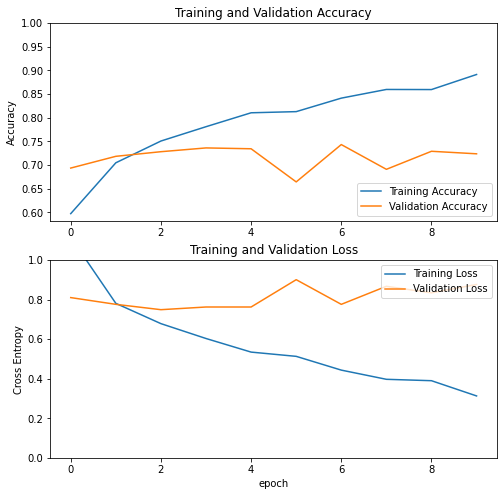

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save("/content/gdrive/Shared drives/Bangkit Data/Bany/model2/my_model_mobilenetV2.h5") 

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

print("Layers to train: ", len(base_model.layers) - len(base_model.layers[:fine_tune_at]))

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155
Layers to train:  55


### Compile the model

Compile the model using a much lower training rate.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 2,629,093
Trainable params: 2,233,701
Non-trainable params: 395,392
______________________________________

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 62


In [ ]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=total_epochs, 
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_generator, 
                         validation_steps=len(val_generator)
                         )

Epoch 10/20
71/71 [==============================] - 57s 809ms/step - loss: 1.6189 - accuracy: 0.4509 - val_loss: 0.9589 - val_accuracy: 0.7236
Epoch 11/20
71/71 [==============================] - 57s 804ms/step - loss: 0.8967 - accuracy: 0.6607 - val_loss: 0.9353 - val_accuracy: 0.7316
Epoch 12/20
71/71 [==============================] - 57s 809ms/step - loss: 0.7362 - accuracy: 0.7268 - val_loss: 0.9497 - val_accuracy: 0.7352
Epoch 13/20
71/71 [==============================] - 57s 801ms/step - loss: 0.6310 - accuracy: 0.7694 - val_loss: 0.9794 - val_accuracy: 0.7254
Epoch 14/20
71/71 [==============================] - 58s 817ms/step - loss: 0.5507 - accuracy: 0.8023 - val_loss: 0.9870 - val_accuracy: 0.7334
Epoch 15/20
71/71 [==============================] - 58s 817ms/step - loss: 0.4825 - accuracy: 0.8341 - val_loss: 0.9832 - val_accuracy: 0.7396
Epoch 16/20
71/71 [==============================] - 57s 807ms/step - loss: 0.4309 - accuracy: 0.8460 - val_loss: 0.9812 - val_accuracy:

In [ ]:
model.save("/content/gdrive/Shared drives/Bangkit Data/Bany/model2/my_model_mobilenetV2_finetuning.h5") 

In [ ]:
val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 1129 images belonging to 5 classes.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classes = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes
predict = model.predict(val_generator, steps=len(val_generator), verbose=1)

18/18 [==============================] - 11s 587ms/step


Accuracy: 0.749336
Precision: 0.749336
Recall: 0.749336
F1 score: 0.749336
              precision    recall  f1-score   support

           0       0.58      0.34      0.43        93
           1       0.71      0.78      0.74       288
           2       0.79      0.42      0.54       154
           3       0.81      0.93      0.86       531
           4       0.52      0.51      0.51        63

    accuracy                           0.75      1129
   macro avg       0.68      0.60      0.62      1129
weighted avg       0.74      0.75      0.73      1129



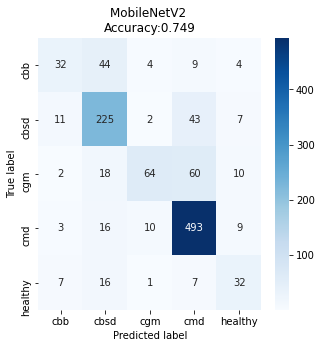

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(y_true, classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, classes,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, classes,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, classes, average='micro')
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_true, classes)
#print(matrix)
print(classification_report(y_true, classes))

cm_df = pd.DataFrame(matrix,
                     index = ['cbb','cbsd','cgm', 'cmd', 'healthy'], 
                     columns = ['cbb','cbsd','cgm', 'cmd', 'healthy'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('MobileNetV2 \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, classes)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: ignored

In [ ]:
print (train_generator.class_indices)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images/255.0, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving train-cbb-444.jpg to train-cbb-444.jpg


NameError: ignored

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 144.4MB 78kB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
     |████████████████████████████████| 256kB 50.4MB/s 
     |████████████████████████████████| 921kB 47.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=2b84930fdbf11d8bd355912bf18115fef7128cab588af327bffec19b5ea8a6d3
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: Pygments 2.1.3
    Uninstalling Pygments-2.1.3:
      Successfully uninstalled Pygments-2.1.3
  Found existing installation: tensorflow-hub 0

In [ ]:
import tensorflowjs as tfjs
tfjs_target_dir = "/content/gdrive/Shared drives/Bangkit Data/Bany/model2/js"
tfjs.converters.save_keras_model(model, tfjs_target_dir)

NameError: ignored

In [ ]:
new_model = tf.keras.models.load_model("/content/gdrive/Shared drives/Bangkit Data/Bany/model2/my_model_mobilenetV2_finetuning.h5")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classes = np.argmax(new_model.predict(val_generator), axis=-1)
y_true = val_generator.classes
predict = new_model.predict(val_generator, steps=len(val_generator), verbose=1)

18/18 [==============================] - 10s 578ms/step


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Accuracy: 0.749336
Precision: 0.749336
Recall: 0.749336
F1 score: 0.749336
              precision    recall  f1-score   support

           0       0.58      0.34      0.43        93
           1       0.71      0.78      0.74       288
           2       0.79      0.42      0.54       154
           3       0.81      0.93      0.86       531
           4       0.52      0.51      0.51        63

    accuracy                           0.75      1129
   macro avg       0.68      0.60      0.62      1129
weighted avg       0.74      0.75      0.73      1129



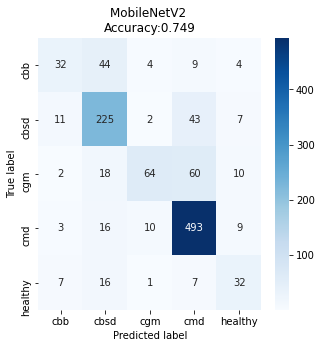

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(y_true, classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, classes,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, classes,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, classes, average='micro')
print('F1 score: %f' % f1)
# kappa
#kappa = cohen_kappa_score(y_true, classes)
#print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_true, predict,multi_class='ovo')
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, classes)
#print(matrix)
print(classification_report(y_true, classes))

cm_df = pd.DataFrame(matrix,
                     index = ['cbb','cbsd','cgm', 'cmd', 'healthy'], 
                     columns = ['cbb','cbsd','cgm', 'cmd', 'healthy'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('MobileNetV2 \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, classes)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import tensorflowjs as tfjs
tfjs_target_dir = "/content/gdrive/Shared drives/Bangkit Data/Bany/model2/js"
tfjs.converters.save_keras_model(new_model, tfjs_target_dir)

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [ ]:
baseline_model = tf.keras.models.load_model("/content/gdrive/Shared drives/Bangkit Data/Valdi/baseline_model")

In [ ]:
classes_baseline = np.argmax(baseline_model.predict(val_generator), axis=-1)
y_true_baseline = val_generator.classes
predict = baseline_model.predict(val_generator, steps=len(val_generator), verbose=1)

18/18 [==============================] - 8s 451ms/step


Accuracy: 0.581045
Precision: 0.581045
Recall: 0.581045
F1 score: 0.581045
              precision    recall  f1-score   support

           0       0.35      0.09      0.14        93
           1       0.52      0.69      0.60       288
           2       0.18      0.08      0.11       154
           3       0.66      0.80      0.73       531
           4       0.65      0.17      0.28        63

    accuracy                           0.58      1129
   macro avg       0.47      0.37      0.37      1129
weighted avg       0.53      0.58      0.53      1129



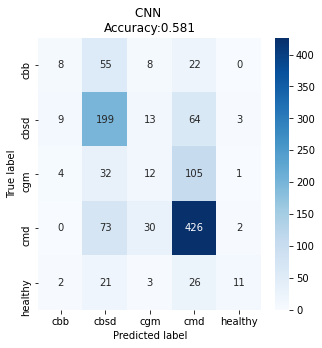

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy = accuracy_score(y_true_baseline, classes_baseline)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_baseline, classes_baseline,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_baseline, classes_baseline,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_baseline, classes_baseline, average='micro')
print('F1 score: %f' % f1)
# kappa
#kappa = cohen_kappa_score(y_true, classes)
#print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_true, predict,multi_class='ovo')
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true_baseline, classes_baseline)
#print(matrix)
print(classification_report(y_true_baseline, classes_baseline))

cm_df_baseline = pd.DataFrame(matrix,
                     index = ['cbb','cbsd','cgm', 'cmd', 'healthy'], 
                     columns = ['cbb','cbsd','cgm', 'cmd', 'healthy'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df_baseline, annot=True,cmap='Blues', fmt='g')
plt.title('CNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_true_baseline, classes_baseline)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()